In [25]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils

In [26]:
# Set random seed for purposes of reproducibility
seed = 21

In [27]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [31]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

50000 50000 10000 10000


In [32]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

Images can't be used by the network as they are, they need to be encoded first and one-hot encoding is best used when doing binary classification

In [33]:
# One-hot encode outputs using to_categorical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
# number of classes in dataset=10
class_num = y_test.shape[1]

Use Sequential model format from Keras

CNN Block-1
1. Convolutional layer
    - number of channels/filters = 32
    - size of the filter =  3 x 3
    - padding='same' we aren't changing the size of the image at all
    - Activation= relu
2. Dropout layer
    - pooling
    - eliminate few connections bw layers=20% of the connection
3. Batch normalization layer
    - normalizes the inputs heading into the next layer

In [46]:
# model = keras.Sequential()
# model.add(keras.layers.layer1)
# model.add(keras.layers.layer2)
# model.add(keras.layers.layer3)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

CNN Block-2
- Convolutional layer with large filter
- Pooling layer that downsamples the images using MaxPooling

In [47]:
model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

CNN Block-3

In [48]:
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

CNN Block- 4 
- Flatten to compress all the layers

In [49]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

CNN Block- 5 
- Densely connect the layers with 32 neurons

In [50]:
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

CNN Block-6
- Dense layer with number of neurons equal to number of classes
- output of this layer will be a 10 neuron vector with each neuron storing some probability that the image in question belongs to the class it represents.

In [51]:
model.add(keras.layers.Dense(class_num, activation='softmax'))

Compile the model with ADAM optimizer

In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_11 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 64)       

Train model using fit() and save the history
- batch_size= how much of the dataset is passed
- epoch= passing a part of dataset in 1 cycle

In [54]:
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 377s 381ms/step - loss: 1.5264 - accuracy: 0.4572 - val_loss: 1.1225 - val_accuracy: 0.6071
Epoch 2/25
782/782 [==============================] - 291s 372ms/step - loss: 1.1029 - accuracy: 0.6166 - val_loss: 0.9823 - val_accuracy: 0.6572
Epoch 3/25
782/782 [==============================] - 291s 373ms/step - loss: 0.9566 - accuracy: 0.6687 - val_loss: 0.9386 - val_accuracy: 0.6739
Epoch 4/25
782/782 [==============================] - 292s 374ms/step - loss: 0.8574 - accuracy: 0.7024 - val_loss: 0.8983 - val_accuracy: 0.6899
Epoch 5/25
782/782 [==============================] - 294s 376ms/step - loss: 0.7876 - accuracy: 0.7270 - val_loss: 0.7709 - val_accuracy: 0.7379
Epoch 6/25
782/782 [==============================] - 295s 378ms/step - loss: 0.7218 - accuracy: 0.7488 - val_loss: 0.9214 - val_accuracy: 0.6894
Epoch 7/25
782/782 [==============================] - 309s 395ms/step - loss: 0.6772 - accuracy: 0.7619 - val_loss: 0.7564 -

In [55]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.25%


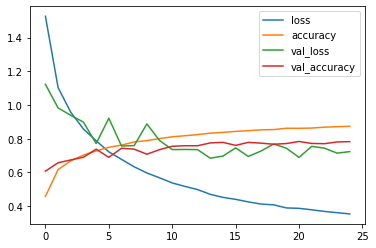

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()